In [1]:
import numpy as np
import pandas as pd
import os
from typing import List 
import easyocr
import re
import requests
import shutil
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import geopandas as gpd

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


## Preprocessing and Visualization

### Image E2-5 (population in 2022)

In [3]:
from decimal import Decimal

def create_dataframe_from_txt(file_path):
    """
    Create a DataFrame from a text file with two columns: region and number of population.
    Input:
        file_path: str, path to the text file
    Output:
        df: pd.DataFrame, DataFrame with two columns: region and number of population
    """
    # Initialize empty lists to store the data
    regions = []
    num_population_list = []

    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            # Clean and split the line into parts using regex to handle different separators
            parts = re.split(r'\s+|[-]', line.strip())
            if len(parts) == 2:
                try:
                    # Convert the parts to integers and append to the lists
                    region = str(parts[0])
                    num_population = Decimal(parts[1])  # Convert string to decimal
                    regions.append(region)
                    num_population_list.append(num_population)
                except ValueError:
                    # Handle the case where conversion to int or decimal fails
                    print(f"Skipping line due to conversion error: {line.strip()}")
    
    # Create the DataFrame
    data = {'Region': regions, 'Population': num_population_list}
    df = pd.DataFrame(data)
    
    return df

# Example usage
file_path = '..\..\Data\Preprocessed\preprocessed_txt\Population\E02_05.txt'
df = create_dataframe_from_txt(file_path)
print(df)

          Region Population
0        Beijing       2184
1        Tianjin       1363
2          Hebei       7420
3         Shanxi       3481
4       Liaoning       4197
5          Jilin       2348
6   Heilongjiang       3099
7       Shanghai       2475
8        Jiangsu       8515
9       Zhejiang       6577
10         Anhui       6127
11        Fujian       4188
12       Jiangxi       4528
13      Shandong      10163
14         Henan       9872
15         Hubei       5844
16         Hunan       6604
17     Guangdong      12657
18       Guangxi       5047
19        Hainan       1027
20     Chongqing       3213
21       Sichuan       8374
22       Guizhou       3856
23        Yunnan       4693
24         Tibet        364
25       Shaanxi       3956
26         Gansu       2492
27       Qinghai        595
28       Ningxia        728
29      Xinjiang       2587


#### Plot line chart

['ADM1_EN', 'ADM1_ZH', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_ZH', 'ADM0_PCODE', 'geometry']
<bound method NDFrame.head of                                     ADM1_EN   ADM1_ZH ADM1_PCODE ADM0_EN  \
0                          Shaanxi Province       陕西省      CN061   China   
1                     Shanghai Municipality       上海市      CN031   China   
2                    Chongqing Municipality       重庆市      CN050   China   
3                         Zhejiang Province       浙江省      CN033   China   
4                          Jiangxi Province       江西省      CN036   China   
5                           Yunnan Province       云南省      CN053   China   
6                         Shandong Province       山东省      CN037   China   
7                         Liaoning Province       辽宁省      CN021   China   
8                   Tibet Autonomous Region     西藏自治区      CN054   China   
9                            Gansu province       甘肃省      CN062   China   
10  Hong Kong Special Administrative Region   香港特

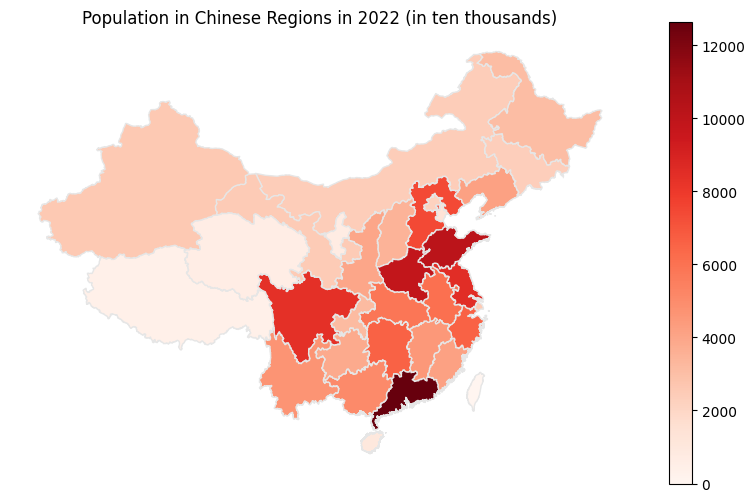

In [4]:
pd.set_option('display.max_columns', None)

#Read the shape file
df1 = gpd.read_file('chn_admbnda_adm1_ocha_2020.shp')
print(list(df1))
print(df1.head)

#Read the file with the target variable
df2 = pd.read_csv('Chinese_Regions_Population.csv')

#Merge the two files
merged=pd.merge(df1, df2, on='ADM1_PCODE')

merged = df1.merge(df2, left_on = 'ADM1_PCODE', right_on = 'ADM1_PCODE',how = 'outer')
merged.fillna(0, inplace=True)
# print(merged.head)
print (merged.dtypes)

#Create the map
fig, ax = plt.subplots(1, figsize=(10,6))
merged.plot(column='Population', cmap='Reds',  linewidth=1, ax=ax, edgecolor='0.9', legend=True)
ax.axis('off')
plt.title("Population in Chinese Regions in 2022 (in ten thousands)")
plt.show()

### Image E02-01

In [6]:
def create_dataframe_from_txt(file_path):
    """
    Create a DataFrame from a text file with three columns: year, urban and rural.
    Input:
        file_path: str, path to the text file
    Output:
        df: pd.DataFrame, DataFrame with three columns: year, urban and rural
    """
    # Initialize empty lists to store the data
    years = []
    urbans = []
    rurals = []

    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            # Clean and split the line into parts using regex to handle different separators
            parts = re.split(r'\s+|[-]', line.strip())
            if len(parts) == 3:
                try:
                    # Convert the parts to integers and append to the lists
                    year = int(parts[0])
                    urban = Decimal(parts[1])
                    rural = Decimal(parts[2])
                    years.append(year)
                    urbans.append(urban)
                    rurals.append(rural)
                except ValueError:
                    # Handle the case where conversion to int fails
                    print(f"Skipping line due to conversion error: {line.strip()}")
    
    # Create the DataFrame
    data = {'Year': years, 'Urban': urban, 'Rural': rural}
    df = pd.DataFrame(data)
    
    return df

# Example usage
file_path = '..\..\Data\Preprocessed\preprocessed_txt\Population\E02_01.txt'
df = create_dataframe_from_txt(file_path)
print(df)

    Year  Urban  Rural
0   1975  57.33  42.67
1   1976  57.33  42.67
2   1977  57.33  42.67
3   1978  57.33  42.67
4   1979  57.33  42.67
5   1980  57.33  42.67
6   1981  57.33  42.67
7   1982  57.33  42.67
8   1983  57.33  42.67
9   1984  57.33  42.67
10  1985  57.33  42.67
11  1986  57.33  42.67
12  1987  57.33  42.67
13  1988  57.33  42.67
14  1989  57.33  42.67
15  1990  57.33  42.67
16  2000  57.33  42.67
17  2001  57.33  42.67
18  2002  57.33  42.67
19  2003  57.33  42.67
20  2004  57.33  42.67
21  2005  57.33  42.67
22  2006  57.33  42.67
23  2007  57.33  42.67
24  2008  57.33  42.67
25  2009  57.33  42.67
26  2010  57.33  42.67
27  2011  57.33  42.67
28  2012  57.33  42.67
29  2013  57.33  42.67
30  2014  57.33  42.67
31  2015  57.33  42.67


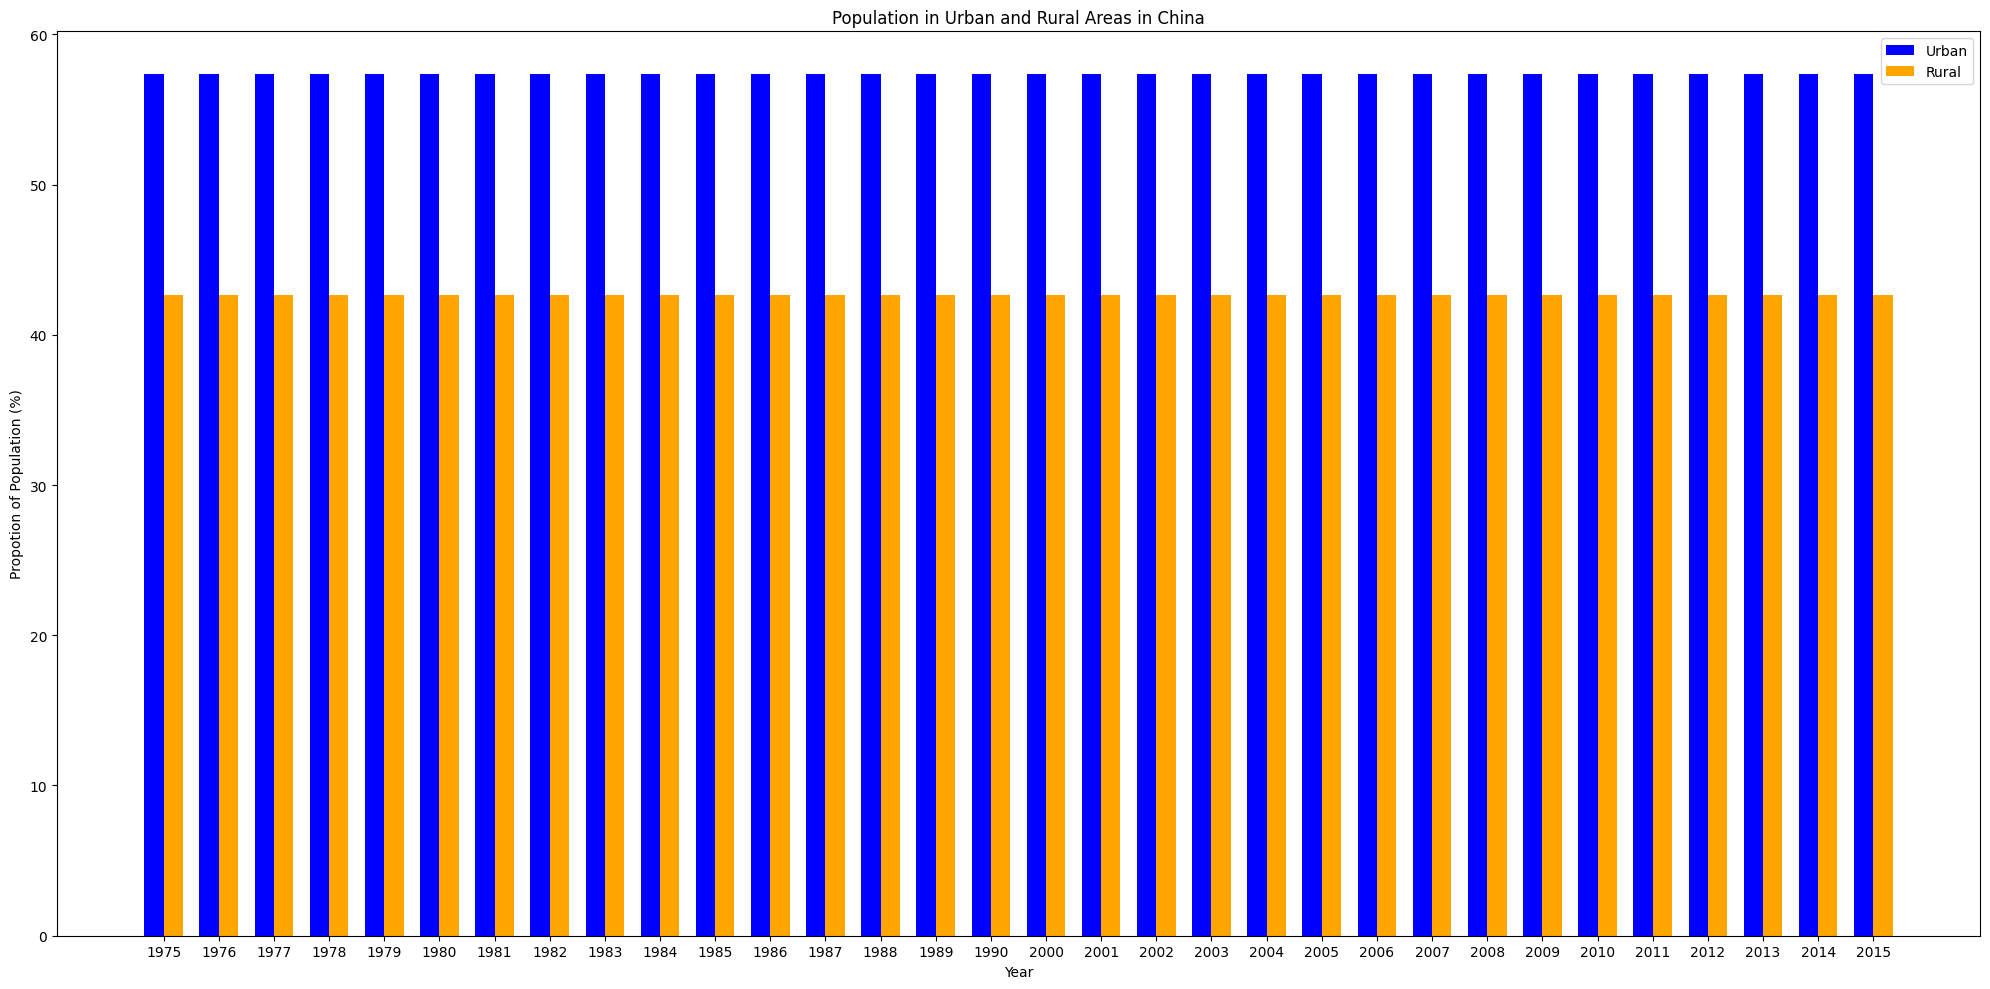

In [7]:
def plot_grouped_bar_chart(df, filename):
    """
    Plot a grouped bar chart from a DataFrame.
    Input:
        df: pd.DataFrame, DataFrame with three columns: year, urban and rural
        filename: str, path to save the plot
    Output:
        bar chart saved as a PNG file
    """
    # Set the positions and width for the bars
    bar_width = 0.35
    bar_positions = np.arange(len(df['Year']))

    # Create the plot
    plt.figure(figsize=(20, 10))

    # Plot the bars for 'Area of Land Pending for Development'
    plt.bar(bar_positions - bar_width/2, df['Urban'], width=bar_width, color='blue', label='Urban')

    # Plot the bars for 'Area of Land Purchased in the year'
    plt.bar(bar_positions + bar_width/2, df['Rural'], width=bar_width, color='orange', label='Rural')

    # Add labels, title, and legend
    plt.xlabel('Year')
    plt.ylabel('Propotion of Population (%)')
    plt.title('Population in Urban and Rural Areas in China')
    plt.xticks(bar_positions, df['Year'])
    plt.legend()

    # Show the plot
    plt.tight_layout()
    
    # # Save the plot as a PNG file
    plt.savefig(filename)
    
    plt.show()

# Example usage
plot_grouped_bar_chart(df, "..\..\Saved figures\Real estate\prop_urban_rural.png")
# plot_line_chart(df, "..\..\Saved figures\Real estate\Employed_foreign.png")

### Image E02-02

In [8]:
def create_dataframe_from_txt(file_path):
    """
    Create a DataFrame from a text file with three columns: year, birthrate and deathrate.
    Input:
        file_path: str, path to the text file
    Output:
        df: pd.DataFrame, DataFrame with three columns: year, birthrate and deathrate
    """
    # Initialize empty lists to store the data
    years = []
    birthrate = []
    deathrate = []

    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            # Clean and split the line into parts using regex to handle different separators
            parts = re.split(r'\s+|[-]', line.strip())
            if len(parts) == 3:
                try:
                    # Convert the parts to integers and append to the lists
                    year = int(parts[0])
                    birth = Decimal(parts[1])
                    death = Decimal(parts[2])
                    years.append(year)
                    birthrate.append(birth)
                    deathrate.append(death)
                except ValueError:
                    # Handle the case where conversion to int fails
                    print(f"Skipping line due to conversion error: {line.strip()}")
    
    # Create the DataFrame
    data = {'Year': years, 'Birthrate': birthrate, 'Deathrate': deathrate}
    df = pd.DataFrame(data)
    
    return df

# Example usage
file_path = '..\..\Data\Preprocessed\preprocessed_txt\Population\E02_02.txt'
df = create_dataframe_from_txt(file_path)
print(df)

    Year Birthrate Deathrate
0   1978     18.25      6.25
1   1979     17.82      6.21
2   1980     18.21      6.34
3   1981     20.91      6.36
4   1982     22.28      6.60
5   1983     20.19      6.90
6   1984     19.90      6.82
7   1985     21.04      6.78
8   1986     22.43      6.86
9   1987     23.33      6.72
10  1988     22.37      6.64
11  1989     21.58      6.54
12  1990     21.06      6.67
13  1991     19.68      6.70
14  1992     18.24      6.64
15  1993     18.09      6.64
16  1994     17.70      6.49
17  1995     17.12      6.57
18  1996     16.98      6.56
19  1997     16.57      6.51
20  1998     15.64      6.50
21  1999     14.64      6.46
22  2000     14.03      6.45
23  2001     13.38      6.43
24  2002     12.86      6.41
25  2003     12.41      6.40
26  2004     12.29      6.42
27  2005     12.40      6.51
28  2006     12.09      6.81
29  2007     12.10      6.93
30  2008     12.14      7.06
31  2009     11.95      7.08
32  2010     11.90      7.11
33  2011     1

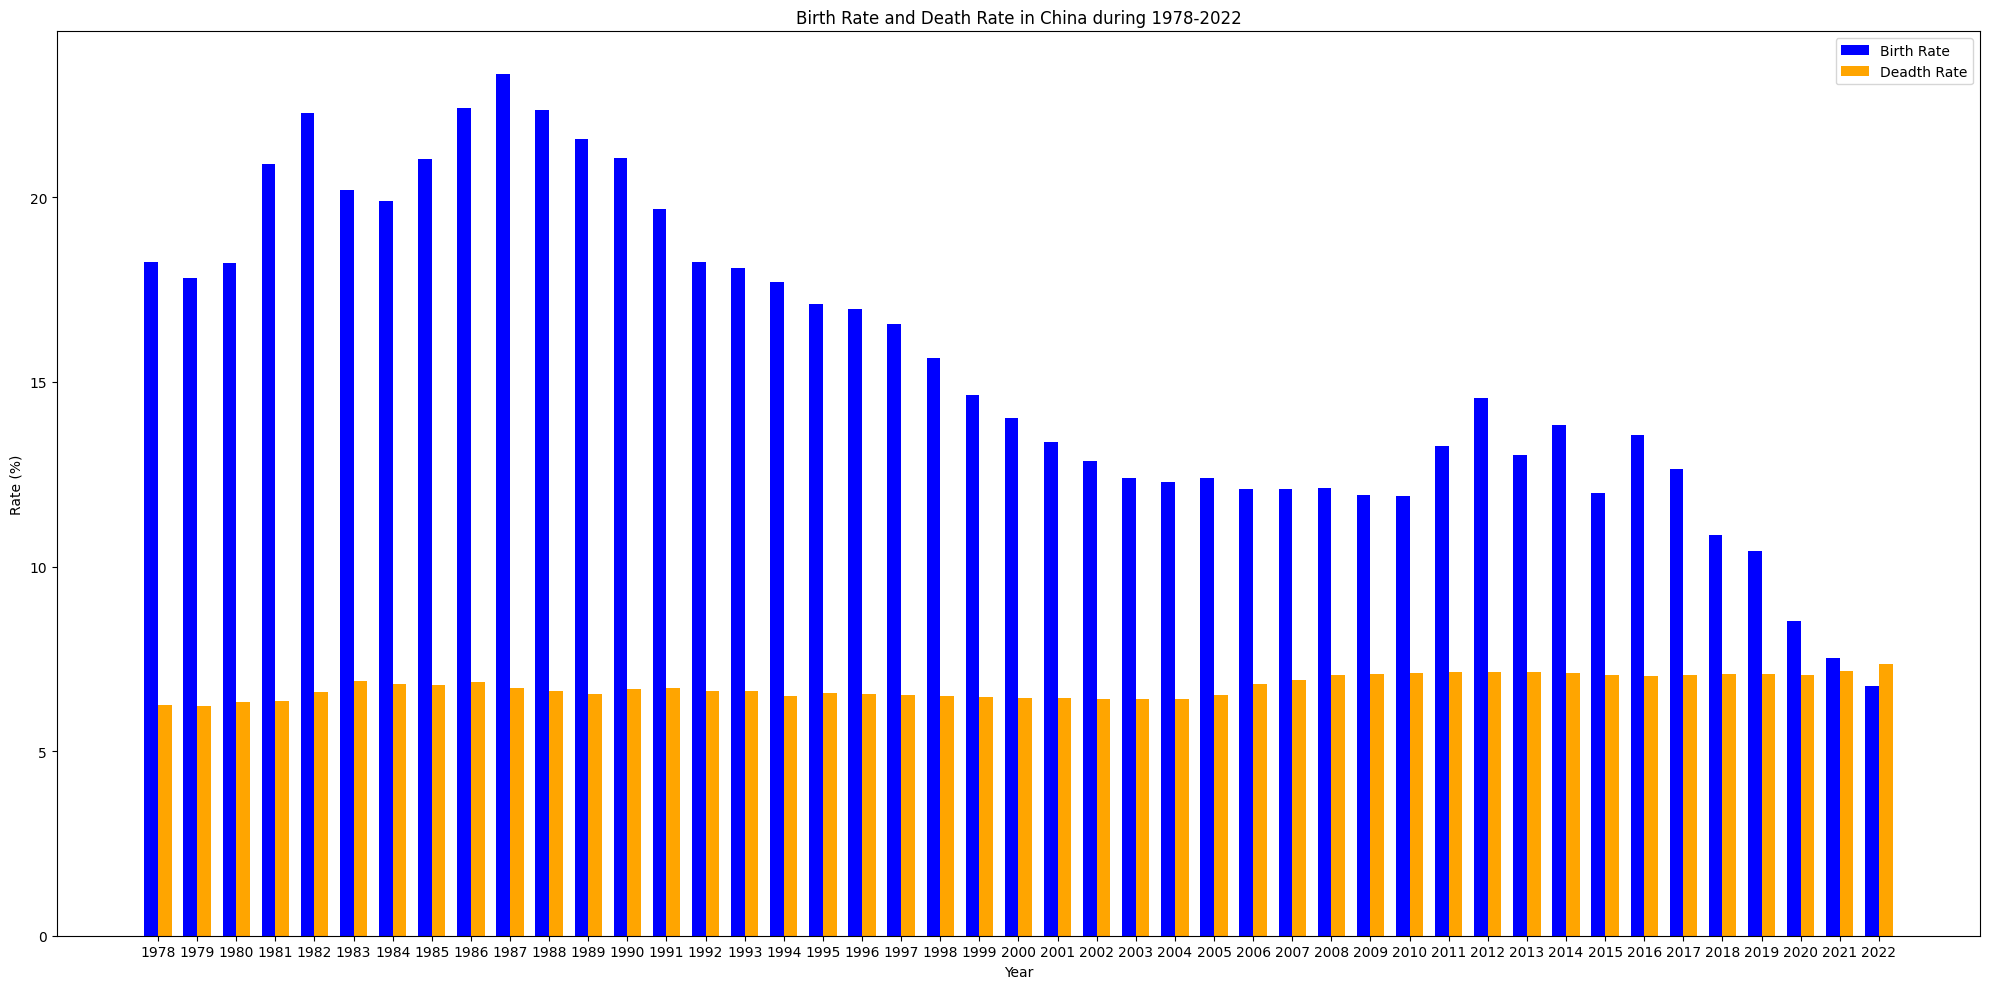

In [9]:
def plot_grouped_bar_chart(df, filename):
    """
    Plot a grouped bar chart from a DataFrame.
    Input:
        df: pd.DataFrame, DataFrame with three columns: year, birthrate and deathrate
        filename: str, path to save the plot
    Output:
        bar chart saved as a PNG file
    """
    # Set the positions and width for the bars
    bar_width = 0.35
    bar_positions = np.arange(len(df['Year']))

    # Create the plot
    plt.figure(figsize=(20, 10))

    # Plot the bars for 'Area of Land Pending for Development'
    plt.bar(bar_positions - bar_width/2, df['Birthrate'], width=bar_width, color='blue', label='Birth Rate')

    # Plot the bars for 'Area of Land Purchased in the year'
    plt.bar(bar_positions + bar_width/2, df['Deathrate'], width=bar_width, color='orange', label='Deadth Rate')

    # Add labels, title, and legend
    plt.xlabel('Year')
    plt.ylabel('Rate (%)')
    plt.title('Birth Rate and Death Rate in China during 1978-2022')
    plt.xticks(bar_positions, df['Year'])
    plt.legend()

    # Show the plot
    plt.tight_layout()
    
    # # Save the plot as a PNG file
    plt.savefig(filename)
    
    plt.show()

# Example usage
plot_grouped_bar_chart(df, "..\..\Saved figures\Real estate\death_birth_rate.png")
# plot_line_chart(df, "..\..\Saved figures\Real estate\Employed_foreign.png")